In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import cumulative_distribution

In [93]:
def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert (c,0,0)
    for i in range(b[-1]+1, 256):
        c = np.append(c,1)
    return c

In [94]:
def hist_matching(c, c_t, im):
    b = np.interp(c,c_t,np.arange(256)) #find closest matchs to b_t
    pix_repl = {i:b[i] for i in range(256)} #dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im,s)
    return im

In [95]:
img1 = cv2.cvtColor(cv2.imread("image2.jpg"),cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("image7.jpg"),cv2.COLOR_BGR2RGB)

In [96]:
img_result = img1.copy()

for i in range(3):
    cdf1 = cdf( img1[ : , : , i ] )
    cdf2 = cdf( img2[ : , : , i ] )
    img_result[ : , :, i] = hist_matching(cdf1, cdf2, img1[ : , : , i])

In [97]:
def pltHist (img,axis):
    for i,col in enumerate(["r","g","b"]):
        hist = cv2.calcHist([img],[i],None,[256],[0,255])
        ax[axis[0],axis[1]].plot(hist,color = col)

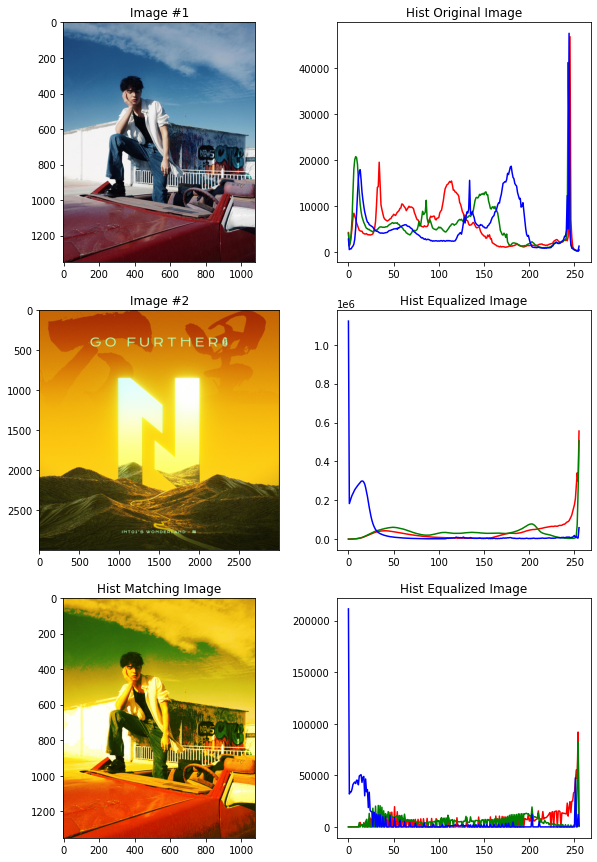

In [98]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))
fig.patch.set_facecolor('white')

ax[0,0].set_title('Image #1')
ax[0,0].imshow(img1)
ax[0,1].set_title('Hist Original Image')
pltHist(img1,[0,1])

ax[1,0].set_title('Image #2')
ax[1,0].imshow(img2)
ax[1,1].set_title('Hist Equalized Image')
pltHist(img2,[1,1])

ax[2,0].set_title('Hist Matching Image')
ax[2,0].imshow(img_result)
ax[2,1].set_title('Hist Equalized Image')
pltHist(img_result,[2,1])

# plt.show()